<a href="https://colab.research.google.com/github/RaniKhune28/Project-/blob/main/E_commerce_Furniture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **E-commerce Furniture**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/ecommerce_furniture_dataset_2024.csv')
df

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping
...,...,...,...,...,...
1995,Modern TV Stand Entertainment Center with Two ...,NaN,$72.49,8,Free shipping
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",NaN,$276.65,2,Free shipping
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",NaN,$196.44,10,Free shipping
1998,Furniture Acrylic Coffee Table Transparent Liv...,NaN,$228.18,0,Free shipping


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [ ]:
df.isnull().sum()

,0
productTitle,0
originalPrice,1513
price,0
sold,0
tagText,3


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(17)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,sold
count,470.00000
mean,78.12766
std,519.04085
min,0.00000
25%,4.00000
50%,10.00000
75%,28.75000
max,10000.00000


In [ ]:
df

,productTitle,originalPrice,price,sold,tagText
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...","$1,294.04",$123.4,53,Free shipping
7,"Living Room Furniture, Modern 3-Piece Includin...","$1,474.17",$734.58,5,Free shipping
20,7-piece patio furniture set modular wicker out...,$671.47,$331.24,39,Free shipping
...,...,...,...,...,...
1921,"Black Kitchen Table and Chairs for 4, Compact ...",$427.16,$143.51,1,Free shipping
1924,"Daybed with Trundle, Modern Linen Upholstered ...",$423.55,$248.13,2,Free shipping
1934,"Living Room Sofa, 149-Inch U-Shaped Sectional ...","$1,239.31",$613.66,2,Free shipping
1938,"5 Piece Patio Conversation Set, Wicker Rattan ...",$392.22,$232.83,5,Free shipping


In [ ]:
df.shape

(2000, 5)

In [ ]:
df.drop(['originalPrice'], axis=1, inplace=True)

In [ ]:
df.head()

,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$21.37,1,Free shipping


In [ ]:
df['tagText'].value_counts()

,count
tagText,
Free shipping,1880
+Shipping: $5.09,9
+Shipping: $239.64,2
+Shipping: $80.21,2
+Shipping: $94.92,2
...,...
+Shipping: $134.27,1
+Shipping: $151.69,1
+Shipping: $41.93,1


In [ ]:
df['tagText']= df['tagText'].apply(lambda x: x if x in ['Free shipping', '+Shipping: $5.09']else 'others')

In [ ]:
print(df['tagText'].value_counts())

tagText
Free shipping       1880
others               111
+Shipping: $5.09       9
Name: count, dtype: int64


<Axes: xlabel='tagText', ylabel='count'>

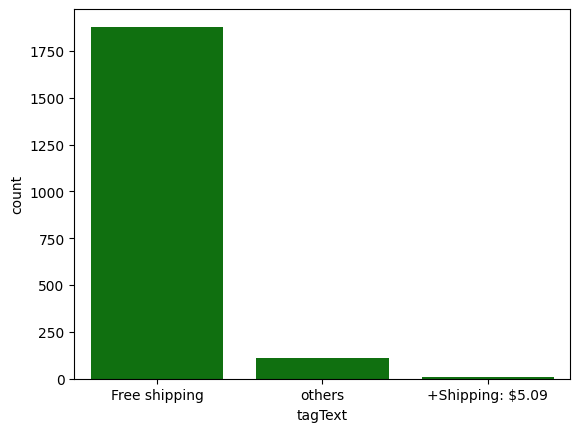

In [ ]:
sns.countplot(x='tagText',data=df, color='green')

In [ ]:
df['price']=df['price'].replace(r'[$,]','',regex=True).astype(float)

In [ ]:
df.head()

,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,21.37,1,Free shipping


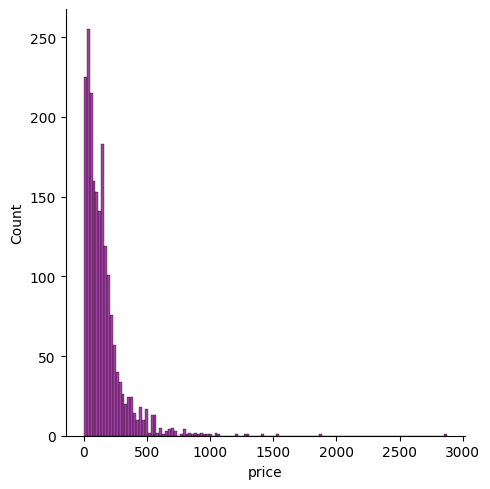

In [ ]:
sns.displot(df['price'], color='purple')

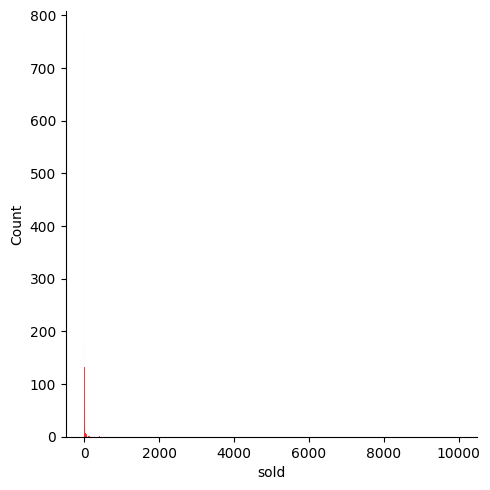

In [ ]:
sns.displot(df['sold'], color='red')

<Axes: xlabel='price', ylabel='sold'>

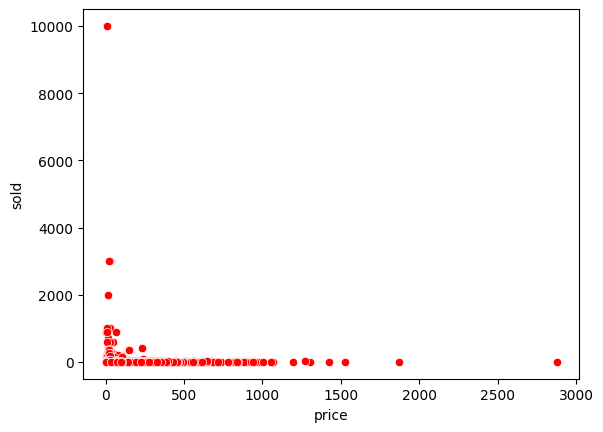

In [ ]:
sns.scatterplot(x='price', y='sold', data=df, color='red')

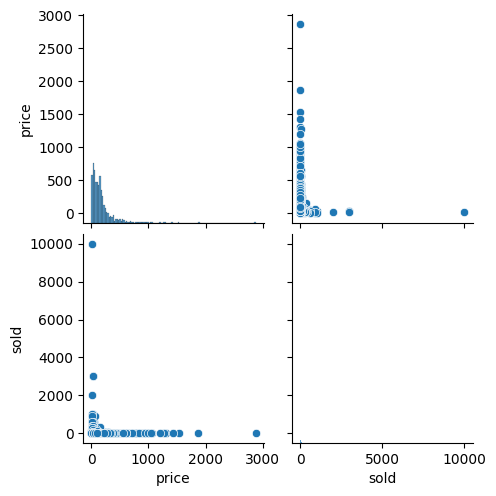

In [ ]:
filtered_df=df[df['tagText']=='Free shipping']
sns.pairplot(filtered_df[['price','sold']])

In [ ]:
le=LabelEncoder()
df['tagText']=le.fit_transform(df['tagText'])

In [ ]:
df.head()

,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,600,1
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,0,1
2,Desser For Bedroom With 7 Fabric Drawers Organ...,39.46,7,1
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,0,1
4,Small Unit Simple Computer Desk Household Wood...,21.37,1,1


In [ ]:
df['tagText'].value_counts()

,count
tagText,
1,1880
2,111
0,9


In [ ]:
X=df.drop(['sold'], axis=1)
y=df['sold']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_train.dtypes)

(1600, 3) (1600,)
productTitle     object
price           float64
tagText           int64
dtype: object


In [ ]:
X_train['productTitle']= le.fit_transform(X_train['productTitle'])

In [ ]:
print(X_train.dtypes)
print(X_train.head())

productTitle      int64
price           float64
tagText           int64
dtype: object
     productTitle   price  tagText
968          1444  187.95        1
240           757   26.76        1
819           266   73.01        1
692           886    1.01        1
420          1007   11.37        1


In [ ]:
le = LabelEncoder()
df['productTitle'] = le.fit_transform(df['productTitle'])

In [ ]:
X_test['productTitle'] = le.transform(X_test['productTitle'])

scaler=StandardScaler()
x_scaled=scaler.fit_transform(X_train)
x_scaled_test=scaler.transform(X_test)
print("Model training using linear regression ")
regressor=LinearRegression()
reg=regressor.fit(x_scaled, y_train)
print("REG SCORE")
print(reg.score(x_scaled_test, y_test))
y_pred1=reg.predict(x_scaled_test)
print("MEAN SQUARED ERROR")
print(mean_squared_error(y_test, y_pred1))
print("R2 SCORE")
print(r2_score(y_test, y_pred1))

Model training using linear regression 
REG SCORE
-0.0011350562434704337
MEAN SQUARED ERROR
5489.743077448762
R2 SCORE
-0.0011350562434704337


In [ ]:
from sklearn.tree import DecisionTreeRegressor
print ("Model training using Decision Tree Regressor")
clf=DecisionTreeRegressor()
clf.fit(x_scaled, y_train)
print("Model Training using decision tree")
print(clf.score(X_test, y_test))
y_pred2=clf.predict(X_test)
print("MEAN SQUARED ERROR")
print(mean_squared_error(y_test, y_pred2))
print("R2 SCORE")
print(r2_score(y_test, y_pred2))

Model training using Decision Tree Regressor
Model Training using decision tree
-1.8506288701225841
MEAN SQUARED ERROR
15631.4775
R2 SCORE
-1.8506288701225841


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestRegressor
print ("Model training using Random Forest Regressor")
clf=RandomForestRegressor()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
y_pred3=clf.predict(X_test)
print("MEAN SQUARED ERROR")
print(mean_squared_error(y_test, y_pred3))
print("R2 SCORE")
print(r2_score(y_test, y_pred3))

Model training using Random Forest Regressor
-1.2718684861613516
MEAN SQUARED ERROR
12457.833952570298
R2 SCORE
-1.2718684861613516


In [ ]:
from sklearn.svm import SVR
print ("Model training using Support Vector Regressor")
clf=SVR()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
y_pred4=clf.predict(X_test)
print("MEAN SQUARED ERROR")
print(mean_squared_error(y_test, y_pred4))
print("R2 SCORE")
print(r2_score(y_test, y_pred4))

Model training using Support Vector Regressor
-0.035768502081813036
MEAN SQUARED ERROR
5679.6562348729485
R2 SCORE
-0.035768502081813036


In [ ]:
print(type(y_pred1))
print(type(y_test))
print(type(X_test))
print(type(x_scaled))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [ ]:
y_pred1=pd.Series(y_pred1,index=y_test.index,name='y_pred')
df_new=pd.concat([X_test, y_test.rename('y_test'),y_pred1], axis=1)
df_new.reset_index(drop=True, inplace=True)
df_new.head()

,productTitle,price,tagText,y_test,y_pred
0,86,86.35,1,1,19.112591
1,1411,105.17,1,0,43.460082
2,1085,51.27,2,6,27.388698
3,190,209.11,1,34,10.923123
4,465,467.23,1,3,-5.194739


In [ ]:
df_new.to_csv('E-commerce Furniture Dataset 2025 Report.csv', header=True, index=True)